In [1]:
import os
import math

In [2]:
images_path = 'data/zboże'
os.listdir(images_path)

['DJI_0285.JPG',
 'DJI_0319.JPG',
 'DJI_0250.JPG',
 'DJI_0295.JPG',
 'DJI_0287.JPG',
 'DJI_0334.JPG',
 'DJI_0333.JPG',
 'DJI_0264.JPG',
 'DJI_0336.JPG',
 'DJI_0266.JPG',
 'DJI_0238.JPG',
 'DJI_0219.JPG',
 'DJI_0176.JPG',
 'DJI_0279.JPG',
 'DJI_0237.JPG',
 'DJI_0178.JPG',
 'DJI_0260.JPG',
 'DJI_0243.JPG',
 'DJI_0311.JPG',
 'DJI_0208.JPG',
 'DJI_0230.JPG',
 'DJI_0283.JPG',
 'DJI_0185.JPG',
 'DJI_0335.JPG',
 'DJI_0309.JPG',
 'DJI_0276.JPG',
 'DJI_0320.JPG',
 'DJI_0207.JPG',
 'DJI_0167.JPG',
 'DJI_0226.JPG',
 'DJI_0225.JPG',
 'DJI_0169.JPG',
 'DJI_0184.JPG',
 'DJI_0173.JPG',
 'DJI_0231.JPG',
 'DJI_0197.JPG',
 'DJI_0198.JPG',
 'DJI_0310.JPG',
 'DJI_0253.JPG',
 'DJI_0314.JPG',
 'DJI_0221.JPG',
 'DJI_0288.JPG',
 'DJI_0318.JPG',
 'DJI_0236.JPG',
 'DJI_0273.JPG',
 'DJI_0246.JPG',
 'DJI_0325.JPG',
 'DJI_0267.JPG',
 'DJI_0192.JPG',
 'DJI_0281.JPG',
 'DJI_0290.JPG',
 'DJI_0222.JPG',
 'DJI_0196.JPG',
 'DJI_0284.JPG',
 'DJI_0224.JPG',
 'DJI_0241.JPG',
 'DJI_0235.JPG',
 'DJI_0181.JPG',
 'DJI_0304.JPG

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL.ExifTags import TAGS
import piexif
from GPSPhoto import gpsphoto

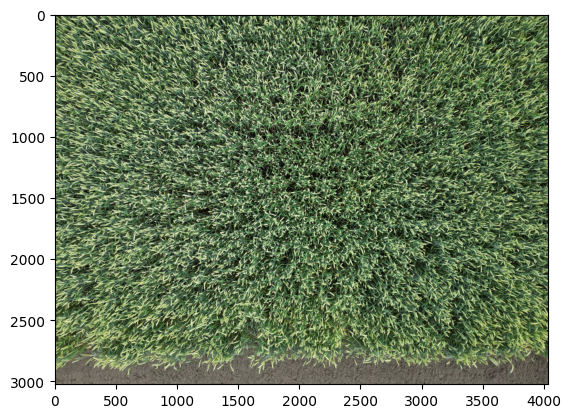

In [4]:
image = Image.open(os.path.join(images_path, 'DJI_0164.JPG'))
exifdata = piexif.load(image.info.get('exif'))
plt.imshow(image)
plt.axis('off')

In [5]:
data = gpsphoto.getGPSData(os.path.join(images_path, 'DJI_0164.JPG'))
data

{'Latitude': 52.201048972222225,
 'Longitude': 17.253317083333332,
 'Altitude': 114.247}

52.20098980555556


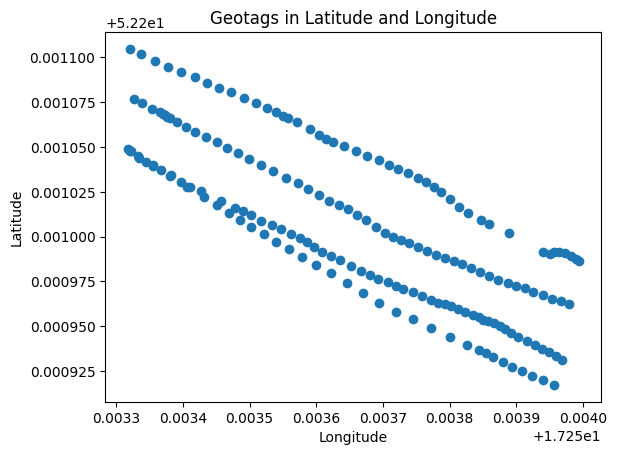

In [54]:
import matplotlib as mpl
import matplotlib.cm as cm
longs = []
lats = []
images_list = os.listdir(images_path)
colors = mpl.colormaps['magma']

for image in images_list:
    image_path = os.path.join(images_path, image)
    data = gpsphoto.getGPSData(image_path)
#    plt.scatter(data['Longitude'], data['Latitude'])

    longs.append(data['Longitude'])
    lats.append(data['Latitude'])
plt.scatter(longs, lats)
plt.title('Geotags in Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
print(lats[0])

In [7]:
def equidistant_cylindrical_projection(latitude, longitude, width, height):
    return (width * (180 + latitude) / 360, height * (90 - longitude) / 180)

In [8]:
def lat_degrees_to_m_at_lat(lat):
    lat *= math.pi / 180 # Convert to radians
    return 111412.84 * math.cos(lat) - 93.5 * math.cos(3 * lat) + 0.118 * math.cos(5 * lat)

def long_degrees_to_m_at_lat(lat):
    lat *= math.pi / 180
    return 111412.84 * math.cos(lat) - 93.5 * math.cos(3 * lat) + 0.118 * math.cos(5 * lat)

In [9]:
height_in_lat_degrees = max(lats) - min(lats)
width_in_long_degrees = max(longs) - min(longs)
width_in_long_degrees, height_in_lat_degrees

(0.0006761944444448886, 0.00018752777777564233)

In [10]:
# Calculate center lat for approximations
center_lat = (max(lats) + min(lats)) / 2
center_lat

52.20101101388889

In [11]:
# At given center lat, one degree of each long and lat is given by these functions
width_meters = long_degrees_to_m_at_lat(center_lat) * width_in_long_degrees
height_meters = lat_degrees_to_m_at_lat(center_lat) * height_in_lat_degrees
width_meters, height_meters

(46.23138419202508, 12.821265853699307)

In [12]:
def long_lat_to_x_y(long, lat, ref_long, ref_lat):
    c_lat = (lat + ref_lat) / 2
    translation_long = long - ref_long
    translation_lat = lat - ref_lat
    return (
        long_degrees_to_m_at_lat(c_lat) * translation_long,
        lat_degrees_to_m_at_lat(c_lat) * translation_lat
    )

In [13]:
max(longs), max(lats)

(17.253993277777777, 52.20110477777778)

In [14]:
# Basically 0, 0 point of the coordinate system
REF_LONG = min(longs)
REF_LAT = min(lats)
REF_LONG, REF_LAT

(17.253317083333332, 52.20091725)

Text(0.5, 1.0, 'Geotags converted to x, y coordinate sytstem')

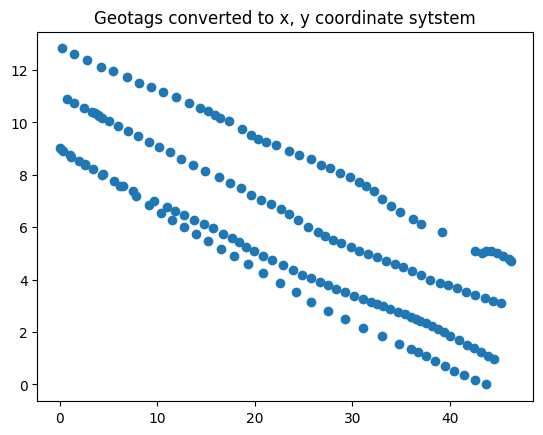

In [52]:
# Results seem to be correct, validated with google maps distance measurement between coords
result = [long_lat_to_x_y(lo, lat, REF_LONG, REF_LAT) for lo, lat in zip(longs, lats)]
long, lat = zip(*result)
#for long, lat in result:
plt.scatter(long, lat)
plt.title('Geotags converted to x, y coordinate sytstem')

In [16]:
x0, y0 = equidistant_cylindrical_projection(lats[0], longs[0], 1, 1)
x1, y1 = equidistant_cylindrical_projection(lats[1], longs[1], 1, 1)
x0, y0, x1, y1

(0.6450027494598766,
 0.40414566959876547,
 0.6450028759259259,
 0.40414590216049384)

In [17]:
image = Image.open(os.path.join(images_path, 'DJI_0164.JPG'))
image = np.array(image)
print(image.shape)
h, w, _ = image.shape
h, w

(3024, 4032, 3)


(3024, 4032)

In [18]:
def split_to_grid(image, piece_h, piece_w):
    height = np.ceil(image.shape[0] / piece_h).astype(int)
    width = np.ceil(image.shape[1] / piece_w).astype(int)
    pieces = np.empty([height, width], dtype=object)
    for idx_i, i in enumerate(range(0, image.shape[0], piece_h)):
        for idx_j, j in enumerate(range(0, image.shape[1], piece_w)):
            pieces[idx_i, idx_j] = image[i:i+piece_h, j:j+piece_w]
    return pieces

In [19]:
def split_to_pieces(image, piece_h, piece_w):
    pieces = [
        image[i:i+piece_h, j:j+piece_w]
        for i in range(0, image.shape[0], piece_h)
        for j in range(0, image.shape[1], piece_w)
    ]
    rows = np.ceil(image.shape[0] / piece_h).astype(int)
    cols = np.ceil(image.shape[1] / piece_w).astype(int)
    return pieces, rows, cols

In [20]:
def merge_pieces(pieces: list, rows: int, cols: int):
    first_column = [pieces[idx] for idx in range(0, rows * cols, cols)]
    first_row = pieces[:cols]
    print(len(first_column))
    max_width = sum(map(lambda x: x.shape[1], first_row))
    max_height = sum(map(lambda x: x.shape[0], first_column))
    print(max_height, max_width)
    merged_image = np.zeros([max_height, max_width, 3])
    last_filled_row = 0
    last_filled_column = 0
    for i in range(rows):
        for j in range(cols):
            pieces_idx = (i * cols) + j
            merged_image[
                last_filled_row:last_filled_row + pieces[pieces_idx].shape[0],
                last_filled_column:last_filled_column + pieces[pieces_idx].shape[1]
            ] = pieces[pieces_idx]
            last_filled_row += pieces[pieces_idx].shape[0]
            last_filled_column += pieces[pieces_idx].shape[1]
        last_filled_column = 0

In [21]:
PIECE_SIZE = 240
INPUT_SIZE = 640

In [22]:
pieces, rows, cols = split_to_pieces(image, 240, 240)
len(pieces), rows, cols, rows * cols

(221, 13, 17, 221)

In [23]:
# Because cropping to 240x240 is satisfactory and it results in 13x17 grid we will use this grid size and
# find values of width and height that will better split the image, so that there are no smaller bits on the edges
SEGMENT_HEIGHT = np.ceil(image.shape[0] / rows).astype(int)
SEGMENT_WIDTH = np.ceil(image.shape[1] / cols).astype(int)
SEGMENT_HEIGHT, SEGMENT_WIDTH

(233, 238)

In [24]:
pieces, rows, cols = split_to_pieces(image, SEGMENT_HEIGHT, SEGMENT_WIDTH)
len(pieces), rows, cols, rows * cols

(221, 13, 17, 221)

In [25]:
gwhd_image = Image.open('/home/js/gwhd_2021-2/images/0ee3b9b357ccc1b8a15b07765f2707a79a82bcc0f21b918d44f942af0b9060d4.png').convert("RGB")
gwhd_image = np.array(gwhd_image)

In [26]:
import albumentations as A

In [27]:
resize_transform = A.Resize(640, 640)

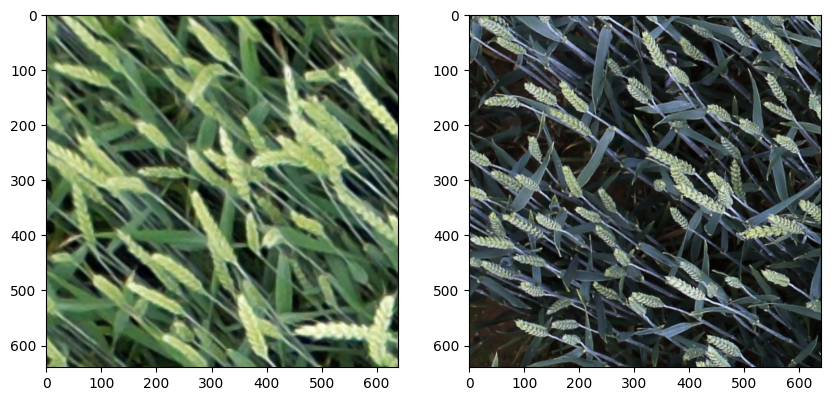

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(resize_transform(image=pieces[2])['image'])
axs[1].imshow(resize_transform(image=gwhd_image)['image'])

In [29]:
#fig, axs = plt.subplots(pieces.shape[0], pieces.shape[1], figsize=(10, 10))
#for i in range(pieces.shape[0]):
    #for j in range(pieces.shape[0]):
        #axs[i, j].imshow(pieces[i, j])
        #axs[i, j].axis('off')
#fig.tight_layout()


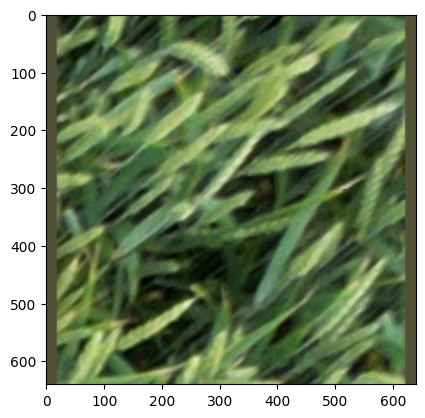

In [30]:
from model.augmentations import GWHD_PAD_VALUE
transform = A.Compose(
    [
        A.PadIfNeeded(min_height=SEGMENT_HEIGHT, min_width=SEGMENT_WIDTH, border_mode=0, value=GWHD_PAD_VALUE),
        A.Resize(height=INPUT_SIZE, width=INPUT_SIZE)
    ]
)
#transform = A.PadIfNeeded(min_height=640, min_width=640, border_mode=0, value=GWHD_PAD_VALUE)
example_transformed = transform(image=pieces[16])
plt.imshow(example_transformed['image'])
plt.show()

In [31]:
from tqdm import tqdm
import pandas as pd
import torch

from yolov7.plotting import show_image
from yolov7.trainer import filter_eval_predictions
from yolov7 import create_yolov7_model

from model.augmentations import get_gwhd_test_augmentations

from torchvision.transforms import ToTensor

/home/js/miniconda3/envs/custom-yolov7/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:pytorch_accelerated:Setting random seeds


In [32]:
infer_kwargs = {
    'model': 'yolov7',
    'weights': 'runs/train/custom-yolov72023-08-10_08-45-13_server1/best_model_mAP:0.5.pt',
    #'image': 'data/zboże/DJI_0164.JPG',
    'nms_th': 0.45,
    'confidence_th': 0.5,
    'image_size': 640
}


In [33]:
# Duplication
class WheatHeadDetector:
    def __init__(
        self,
        model_name,
        state_dict,
        img_size,
        device
    ):
        self.device = device
        self.model = create_yolov7_model(model_name, num_classes=1, pretrained=False)
        self.model.load_state_dict(state_dict=state_dict['model_state_dict'])
        self.model.to(self.device).eval()
        self.transform = get_gwhd_test_augmentations(img_size, img_size)

    def detect(self, image, conf_th, nms_th):
        image = self.transform(image=image, bboxes=np.array([]), labels=np.array([]))['image']
        image_tensor = ToTensor()(image).to(self.device)

        with torch.no_grad():
            outputs = self.model(image_tensor[None])
            preds = self.model.postprocess(outputs, conf_thres=conf_th, multiple_labels_per_box=False)
            nms_preds = filter_eval_predictions(preds, confidence_threshold=conf_th, nms_threshold=nms_th)

        boxes = nms_preds[0][:, :4]
        scores = nms_preds[0][:, 4]

        return boxes, scores


In [34]:
single_image_density_map = np.zeros([rows, cols])
state_dict = torch.load('/home/js/Documents/yolov7-train-results/custom/custom_yolov7_2_with_augmentations_k2/best_model_mAP:0.5.pt')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
detector = WheatHeadDetector(model_name=infer_kwargs['model'], state_dict=state_dict, img_size=INPUT_SIZE, device=device)
for idx, piece in tqdm(enumerate(pieces)):
    i = int(idx / cols)
    j = idx % cols
    boxes, scores = detector.detect(piece, conf_th=0.5, nms_th=0.45)
    single_image_density_map[i, j] = boxes.shape[0]

221it [00:26,  8.24it/s]


Text(0.5, 1.0, 'Wheat density map for single high resolution UAV image')

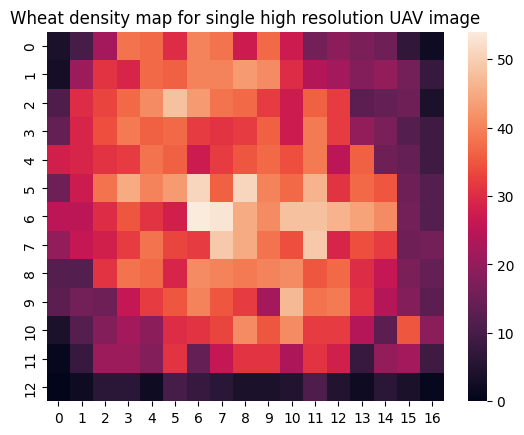

In [35]:
import seaborn as sns
sns.heatmap(single_image_density_map)
plt.title("Wheat density map for single high resolution UAV image")

In [36]:
def apply_density(target, ci, cj, source):
    h, w = source.shape
    sci = int(h/2)
    scj = int(w/2)
    for i in range(-sci, sci):
        for j in range(-scj, scj):
            target[ci + i, cj + j] = max(
                target[ci + i, cj + j],
                source[sci + i, scj + j]
            )
    return target

100%|██████████| 182/182 [1:25:48<00:00, 28.29s/it]


<Axes: >

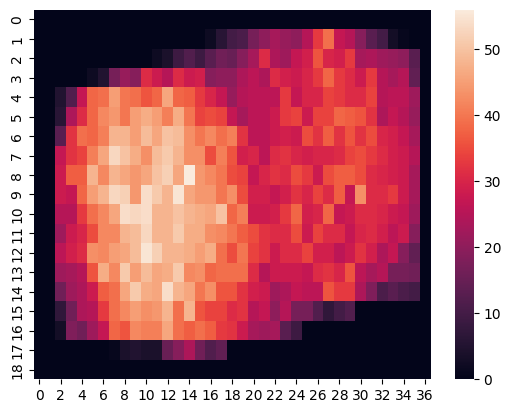

In [45]:
field_density_map = np.zeros([19, 37], dtype=float)
SHIFT_X = 10
SHIFT_Y = 7
for input_image in tqdm(os.listdir(images_path)):
    # Load image
    image = Image.open(os.path.join(images_path, input_image))
    gps_data = gpsphoto.getGPSData(os.path.join(images_path, input_image))
    image = np.array(image)

    #single_image_density_map = np.ones([rows, cols])

    single_image_density_map = np.zeros([rows, cols])
    pieces, rows, cols = split_to_pieces(image, SEGMENT_HEIGHT, SEGMENT_WIDTH)
    for idx, piece in enumerate(pieces):
        i = int(idx / cols)
        j = idx % cols
        boxes, scores = detector.detect(piece, conf_th=0.5, nms_th=0.45)
        single_image_density_map[i, j] = boxes.shape[0]

    lat = gps_data['Latitude']
    long = gps_data['Longitude']
    x, y = long_lat_to_x_y(long, lat, REF_LONG, REF_LAT)
    x /= 2.4752 # Conver from meters to segments which are about 2.5m
    y /= 2.4931
    field_density_map = apply_density(field_density_map, int(y) + SHIFT_Y, int(x) + SHIFT_X, single_image_density_map)

sns.heatmap(field_density_map)

Text(0.5, 1.0, 'Wheat density map')

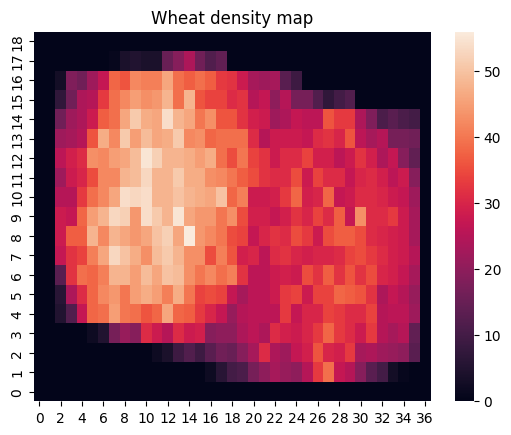

In [50]:
g = sns.heatmap(field_density_map)
g.invert_yaxis()
plt.title('Wheat density map')

In [38]:
DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

KeyError: 'DATASET_ROOT_DIR'

In [ ]:
def bboxes_to_bboxes_string(bboxes):
    return ';'.join([' '.join(map(str, map(int, bbox))) for bbox in np.array(bboxes)])

In [ ]:
def bboxes_string_to_bboxes(bboxes_string):
    return np.array([list(map(int, bbox.split(' '))) for bbox in bboxes_string.split(';')])

In [ ]:
from infer import infer

pieces_names = []

# Split all images and save to training set
for image_name in tqdm(os.listdir(images_path)):
    image_path = os.path.join(images_path, image_name)
    image = Image.open(image_path)
    pieces = split_to_pieces(np.array(image), 640, 640)
    for i, piece in enumerate(pieces):
        piece = transform(image=piece)['image']
        piece = Image.fromarray(piece)
        piece_name = f'pseudo_labeled_{image_name}_{i}.jpg'
        piece.save(os.path.join(DATASET_ROOT_DIR, 'images', piece_name))
        pieces_names.append(piece_name)

pieces_names

  0%|          | 0/182 [00:00<?, ?it/s]


NameError: name 'split_to_pieces' is not defined

In [ ]:
infer_kwargs = {
    'model': 'yolov7',
    'weights': 'runs/train/custom-yolov72023-08-10_08-45-13_server1/best_model_mAP:0.5.pt',
    #'image': 'data/zboże/DJI_0164.JPG',
    'nms_th': 0.45,
    'confidence_th': 0.5,
    'image_size': 640
}


In [ ]:
# Test retrieving labels
image_path = os.path.join(DATASET_ROOT_DIR, 'images', 'pseudo_labeled_DJI_0285.JPG_17.jpg')
image_tensor, boxes, scores = infer(image=image_path, **infer_kwargs)
string = bboxes_to_bboxes_string(boxes.cpu().numpy())
string

'262 262 290 299;265 211 286 248;487 356 511 392;389 581 418 610;403 148 430 178;229 485 264 518;324 350 355 385;556 4 573 40;514 569 555 626;202 84 221 115;426 54 476 79;36 166 60 191;151 83 170 111;609 258 632 289;10 352 36 373;305 434 326 456;31 479 61 504;240 312 279 350;104 534 144 576;31 272 65 308;364 437 393 466;398 391 434 418;63 340 93 360;263 141 296 172;301 587 327 610;65 444 91 480;193 38 217 63;180 149 206 170;314 143 353 185;97 517 123 543;82 100 117 132;130 418 154 441;192 445 224 471;359 313 380 345;428 430 446 452;53 13 98 36;227 295 247 333;34 86 55 110;330 34 369 64;90 382 114 407;520 22 542 45;301 485 323 510'

In [ ]:
# custom-yolov72023-08-10_08-45-13_server1 has really high precision
# so even this low confidence threshold yields >0.95 precision
PSEUDO_LABELLING_CONFIDENCE_TH = 0.2

ROUND = 1
ADD_EMPTY = False

train_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv')); train_df

for piece_name in tqdm(pieces_names):
    image_path = os.path.join(DATASET_ROOT_DIR, 'images', piece_name)
    image_tensor, boxes, scores = infer(image=image_path, **infer_kwargs)

    # Pick only the most confident results and append them to train df
    boxes = boxes[scores > PSEUDO_LABELLING_CONFIDENCE_TH]

    if len(boxes) == 0:
        boxes_string = 'no_box'
    else:
        boxes_string = bboxes_to_bboxes_string(boxes.cpu())

    if not ADD_EMPTY and boxes_string == 'no_box':
        continue

    train_df = train_df.append({
        'image_name': piece_name,
        'BoxesString': boxes_string,
        'domain': 'pseudo_labeled'
    }, ignore_index=True)

#train_df.to_csv(os.path.join(DATASET_ROOT_DIR, f'pseudo_labeling_round_{ROUND}_train.csv'), index=False)
train_df

100%|██████████| 6370/6370 [2:05:25<00:00,  1.18s/it]  


,image_name,BoxesString,domain
0,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11
1,00417fc37a35f14ce3044bf2ae6c76d19bf42a426a9403...,931 370 1002 512;698 935 770 1024;47 51 135 14...,Arvalis_3
2,004b381a051838dc0cc8ff293e09823faa1dd6f26e82ff...,528 623 567 703;651 421 755 468;282 287 331 42...,ETHZ_1
3,004ccec5da561b85d8b05ed11c071ac9ef3af5c8c9a1d6...,353 362 440 484;36 326 97 382;199 105 274 172;...,Arvalis_2
4,006f18cc577457d0d0b987d1af19e5568541cc5f84e143...,4 5 60 43;0 34 18 73;52 63 90 127;259 0 338 68...,NMBU_1
...,...,...,...
9851,pseudo_labeled_DJI_0179.JPG_30.jpg,223 198 256 238;480 261 506 295;66 493 105 535...,pseudo_labeled
9852,pseudo_labeled_DJI_0179.JPG_31.jpg,608 226 636 265;511 400 549 458;362 170 389 20...,pseudo_labeled
9853,pseudo_labeled_DJI_0179.JPG_32.jpg,59 117 79 148;603 493 641 539;27 461 53 519;19...,pseudo_labeled
9854,pseudo_labeled_DJI_0179.JPG_33.jpg,440 182 515 239;437 311 464 346;265 395 318 45...,pseudo_labeled


In [ ]:
train_df.to_csv(os.path.join(DATASET_ROOT_DIR, f'pseudo_labeling_round_{ROUND}_train.csv'), index=False)

In [ ]:
# Example image with boxes
pseudo_labeled_image_name = 'pseudo_labeled_DJI_0179.JPG_31.jpg'
train_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, f'pseudo_labeling_round_1_train.csv'))
image_path = os.path.join(DATASET_ROOT_DIR, 'images', pseudo_labeled_image_name)
boxes = train_df[train_df['image_name'] == pseudo_labeled_image_name]['BoxesString'].values
boxes

array(['0'], dtype=object)

In [ ]:
from matplotlib import patches

# Duplicate from infer.py, could not import it
def draw_bboxes(img, bboxes, conf_scores):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for bbox, conf_score in zip(bboxes, conf_scores):
        x_min, y_min, x_max, y_max = bbox
        rect1 = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=4, edgecolor='w', fill=False)
        rect2 = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='k', fill=False)
        ax.add_patch(rect1)
        ax.add_patch(rect2)
    plt.show()

In [ ]:
boxes = bboxes_string_to_bboxes(str(boxes[0]))
boxes

array([[608, 226, 636, 265],
       [511, 400, 549, 458],
       [362, 170, 389, 203],
       [477, 285, 498, 312],
       [517, 181, 549, 236],
       [ 13, 417,  38, 457],
       [365, 214, 395, 267],
       [145, 165, 180, 222],
       [570, 193, 592, 227],
       [115, 442, 135, 473],
       [362,  93, 386, 133],
       [406, 394, 431, 445],
       [353, 435, 386, 479],
       [293, 110, 319, 147],
       [532, 380, 564, 419],
       [457, 206, 485, 238],
       [104, 267, 125, 303],
       [429, 142, 461, 194],
       [571, 373, 598, 398],
       [133, 335, 164, 359],
       [441, 366, 470, 424],
       [616, 178, 636, 219],
       [ 84, 332, 110, 360],
       [200, 507, 231, 549],
       [550, 142, 570, 174],
       [231,  85, 258, 121],
       [233, 472, 255, 502],
       [165,  93, 194, 158],
       [570, 119, 602, 161],
       [253, 114, 277, 155],
       [550, 500, 578, 542],
       [ 87, 379, 110, 439],
       [463, 339, 485, 382],
       [390, 226, 425, 276]])

/home/js/gwhd_2021-2/images/pseudo_labeled_DJI_0179.JPG_31.jpg


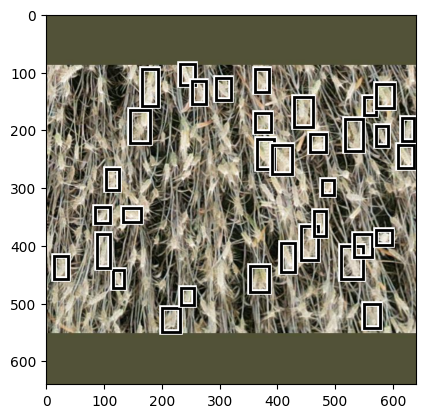

In [ ]:
print(image_path)
draw_bboxes(Image.open(image_path), boxes, np.ones(len(boxes)))

In [ ]:
# Check result with vim diff
for index, row in tqdm(train_df.iterrows()):
    boxes_string = row['BoxesString']
    if boxes_string == 'no_box':
        continue
    boxes = bboxes_string_to_bboxes(boxes_string)
    # Clip boxes to image size
    clipped_boxes = np.clip(boxes, 0, 1024)
    test = clipped_boxes[clipped_boxes > 1024]
    if test.shape[0] > 0:
        print(test)
    train_df.iloc[index, train_df.columns.get_loc('BoxesString')] = bboxes_to_bboxes_string(clipped_boxes)
train_df.to_csv(os.path.join(DATASET_ROOT_DIR, f'pseudo_labeling_round_{ROUND}_train.csv'), index=False)
train_df

0it [00:00, ?it/s]


AttributeError: 'int' object has no attribute 'split'

In [ ]:
import pandas as pd
df = pd.read_csv('~/gwhd_2021-2/pseudo_labeling_round_1_train.csv')
df = df[df['domain'] == 'pseudo_labeled']
df

,image_name,BoxesString,domain
3654,pseudo_labeled_DJI_0285.JPG_0.jpg,573 97 604 128;514 551 563 581;438 589 471 626...,pseudo_labeled
3655,pseudo_labeled_DJI_0285.JPG_1.jpg,231 327 262 365;454 0 484 43;410 0 445 47;295 ...,pseudo_labeled
3656,pseudo_labeled_DJI_0285.JPG_2.jpg,220 289 259 341;553 271 581 328;265 583 285 62...,pseudo_labeled
3657,pseudo_labeled_DJI_0285.JPG_3.jpg,272 76 294 120;441 4 472 37;425 516 466 557;30...,pseudo_labeled
3658,pseudo_labeled_DJI_0285.JPG_4.jpg,362 470 409 515;472 110 500 163;21 92 57 131;6...,pseudo_labeled
...,...,...,...
9851,pseudo_labeled_DJI_0179.JPG_30.jpg,223 198 256 238;480 261 506 295;66 493 105 535...,pseudo_labeled
9852,pseudo_labeled_DJI_0179.JPG_31.jpg,608 226 636 265;511 400 549 458;362 170 389 20...,pseudo_labeled
9853,pseudo_labeled_DJI_0179.JPG_32.jpg,59 117 79 148;603 493 641 539;27 461 53 519;19...,pseudo_labeled
9854,pseudo_labeled_DJI_0179.JPG_33.jpg,440 182 515 239;437 311 464 346;265 395 318 45...,pseudo_labeled


In [ ]:
longest_string = ''
image_name = ''
for row in df.iterrows():
    if len(row[1]['BoxesString']) > len(longest_string):
        longest_string = row[1]['BoxesString']
        image_name = row[1]['image_name']
print(len(longest_string))
df.loc[df['image_name'] == image_name, :]

1538


,image_name,BoxesString,domain
7889,pseudo_labeled_DJI_0307.JPG_1.jpg,355 104 391 159;310 94 345 152;273 108 312 186...,pseudo_labeled


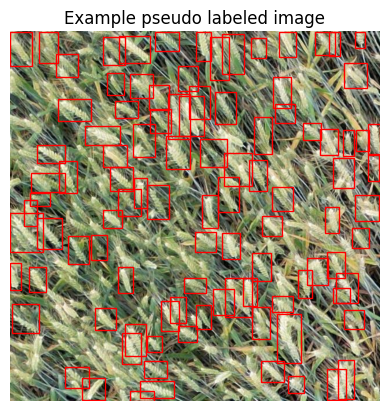

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from PIL import Image

example_image_boxes = df.loc[df['image_name'] == image_name, 'BoxesString'].values[0].split(';')
example_image_boxes = np.array([list(map(int, bbox.split(' '))) for bbox in example_image_boxes])
example_image_boxes.shape[0]
example_image_name = df.loc[df['image_name'] == image_name, 'image_name'].values[0]
example_image = Image.open(os.path.join('/home/js/gwhd_2021-2', 'images', example_image_name)).convert("RGB")
fig, ax = plt.subplots()
ax.imshow(example_image)
for box in example_image_boxes:
    x_min, y_min, x_max, y_max = box
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    plt.title('Example of pseudo labeled image')